# FTIR Analysis

Python script for analysing the data recorded from the Fourier-transform infrared spectroscopy (FTIR) using Principal Component Analysis (PCA). 

## How to use this script
1. Create two folders: `input` (for storing the input files) and `graphs` (for saving the graphs generated from the analysis).

2. Upload the recorded data to the `input` folder, such as the samples for each fiber/experiment are stored in separated folders (e.g., the samples for the paper 1 are stored within the folder `paper1`). The name of the folder will be used for labelling the samples. For example,

```
input/
    |-> paper1/
    |    |-> sample1_from_paper1
    |    |-> sample2_from_paper1
    |    |-> ...
    |
    |-> paper2/
         |-> sample1_from_paper2
         |-> sample2_from_paper2
         |-> ...
```

3. Run the script (click on the button marked in blue)

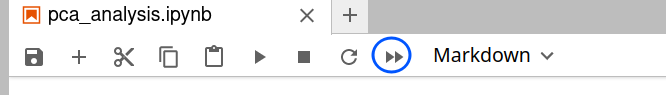

Alternatively, you can run a single cell using either the "play" button or pressing the `SHIFT + ENTER` keys

4. The graphs generated will be saved at the `graphs` folder.

## Author 

Nicolas Lee Guidotti
(nicolas.guidotti@tecnico.ulisboa.pt)

### Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Import Data

Import all samples within the `input` folder. This will parse the data in the `JCAMP-DX` format for Mass Spectrometry and then store the results in a `pandas DataFrame`.

In [2]:
path = "input/"
data = pd.DataFrame()
groups = []

for folder in os.listdir(path):
    
    k = 1
    groups.append(folder)
    
    for file in os.listdir(path + folder):
        with open(path + "/" + folder + "/" + file) as file:
            name = folder[0].upper() + str(k)
            raw = file.readlines()
            info = {}

            i = 0
            while raw[i].startswith("##"):
                _, entry = raw[i].split("##")
                entry = entry.split("=")
                info[entry[0].lower()] = entry[1]
                i += 1
            first_x = float(info["firstx"])
            last_x = float(info["lastx"])
            delta_x = float(info["deltax"])
            yfactor = float(info["yfactor"])
            n = int(info["npoints"])
            delimiter = "+"            
            y = np.array([])
            begin = i
            
            while not "END" in raw[i]:
                entry = np.array(raw[i].split(delimiter), dtype = float)
                y = np.append(y, yfactor * entry[1:])
                i += 1
                
            data[folder, name] = pd.Series(y, index = np.arange(first_x, last_x + delta_x, delta_x))
            k += 1

In [3]:
# Convert dataframe to use hierarchial index
data.columns = pd.MultiIndex.from_tuples(data.columns)

# Here we want to calculate the PCA of the absorbance per sample (i.e., the samples must be the rows and the absorbance, the columns).
data = data.transpose()

data

3997.284900  3995.223381  3993.161862  3991.100344  3989.038825  \
carta C1     0.001768     0.001811     0.001903     0.002024     0.002042   
      C2     0.002888     0.002866     0.002901     0.002988     0.003001   
      C3     0.002840     0.002819     0.002926     0.003024     0.002981   

          3986.977306  3984.915787  3982.854268  3980.792750  3978.731231  \
carta C1     0.001956     0.001916     0.001930     0.001859     0.001750   
      C2     0.002946     0.002969     0.003097     0.003170     0.003100   
      C3     0.002955     0.003030     0.003077     0.003050     0.003028   

          ...  618.455587   616.394068   614.332549   612.271030   \
carta C1  ...     0.024557     0.025084     0.025368     0.025567   
      C2  ...     0.037817     0.038655     0.039149     0.039467   
      C3  ...     0.038110     0.039082     0.039837     0.040483   

          610.209512   608.147993   606.086474   604.024955   601.963436   \
carta C1     0.025807     0.026001     0.026233     0.026568     0.026874   
      C2     0.040008     0.040662     0.041109     0.041394     0.041680   
      C3     0.041148     0.041594     0.041866     0.042260     0.042708   

          599.901918   
carta C1     0.027143  
      C2     0.042012  
      C3     0.043176  

[3 rows x 1649 columns]

### PCA Analysis

Calculates the PCA for each group of samples and then plots the results. You can set the colors (see the [list of colors](https://matplotlib.org/stable/gallery/color/named_colors.html) available) for each group in the `colors` array, the title in the `plt.title()`, the figure size in `figsize=(X, Y)`, etc.

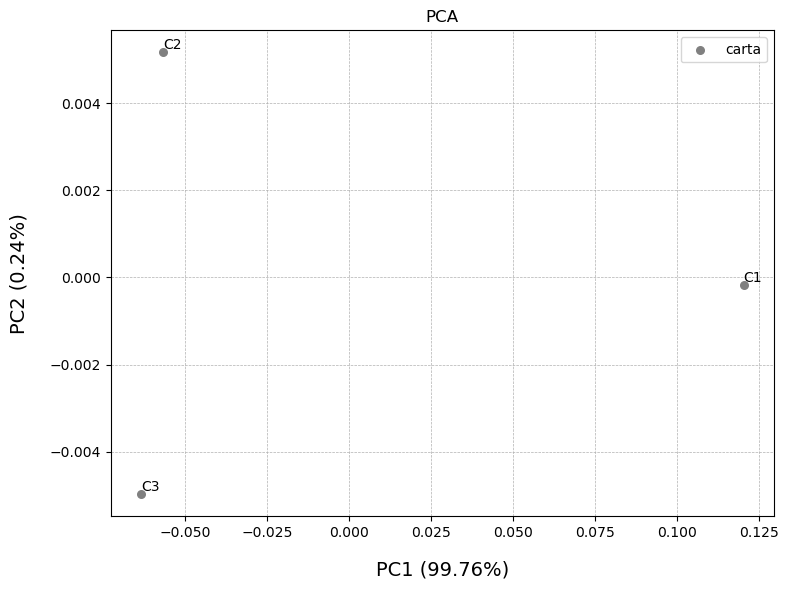

In [4]:
pca = PCA(n_components = 2)
pca.fit(data)

plt.figure(figsize = (8, 6))

colors = ["gray", "tab:blue", "darkorange"]

for i in range(len(groups)):
    df = data.loc[groups[i]]
    pca_result = pca.transform(df)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 30, color = colors[i])
    
    for j in range(len(df.index)):
        plt.text(pca_result[j, 0], pca_result[j, 1], df.index[j], horizontalalignment="left", verticalalignment="bottom")

ratio = pca.explained_variance_ratio_
        
plt.title("PCA")
plt.legend(groups)
plt.xlabel("PC1 ({:.2f}%)".format(100 * ratio[0]), fontsize = 14, labelpad = 15)
plt.ylabel("PC2 ({:.2f}%)".format(100 * ratio[1]), fontsize = 14, labelpad = 15)
plt.grid(True, "major", ls = "--", axis = "both", lw = 0.5)
plt.tight_layout()
plt.savefig("graphs/pca2d.png", dpi = 300)
plt.show()

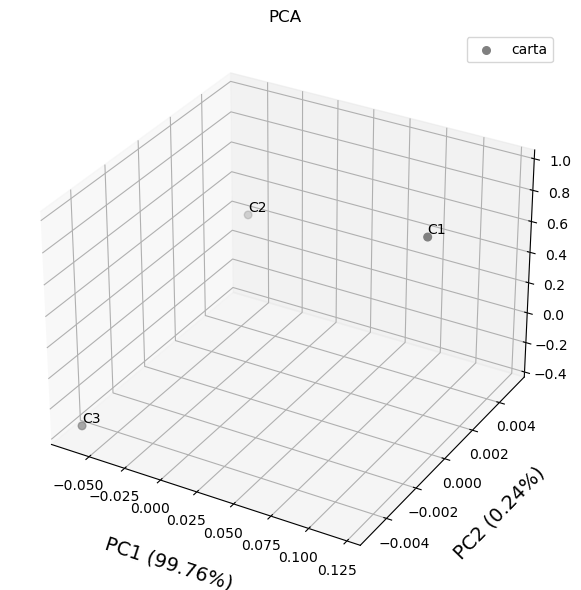

In [12]:
pca = PCA(n_components = 3)
pca.fit(data)

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(projection = "3d")

colors = ["gray", "tab:blue", "darkorange"]

for i in range(len(groups)):
    df = data.loc[groups[i]]
    pca_result = pca.transform(df)
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], s = 30, color = colors[i])
    
    for j in range(len(df.index)):
        ax.text(pca_result[j, 0], pca_result[j, 1], pca_result[j, 2], df.index[j], horizontalalignment="left", verticalalignment="bottom")

ratio = pca.explained_variance_ratio_
        
plt.title("PCA")
plt.legend(groups)
ax.set_xlabel("PC1 ({:.2f}%)".format(100 * ratio[0]), fontsize = 14, labelpad = 15)
ax.set_ylabel("PC2 ({:.2f}%)".format(100 * ratio[1]), fontsize = 14, labelpad = 15)
ax.set_zlabel("PC3 ({:.2f}%)".format(100 * ratio[2]), fontsize = 14, labelpad = 15)
plt.grid(True, "major", ls = "--", axis = "both", lw = 0.5)
plt.tight_layout()
plt.savefig("graphs/pca3d.png", dpi = 300)
plt.show()

### Fingerprinting 

Rerun the analysis considering only the samples that have a wavenumber less than `1800`

In [11]:
data = data.loc[:, data.columns < 1800]
data

1799.705859  1797.644340  1795.582822  1793.521303  1791.459784  \
carta C1     0.003751     0.003758     0.003777     0.003805     0.003813   
      C2     0.005359     0.005383     0.005425     0.005427     0.005396   
      C3     0.005662     0.005654     0.005677     0.005701     0.005683   

          1789.398265  1787.336746  1785.275228  1783.213709  1781.152190  \
carta C1     0.003796     0.003787     0.003799     0.003825     0.003846   
      C2     0.005400     0.005440     0.005441     0.005404     0.005398   
      C3     0.005632     0.005613     0.005612     0.005603     0.005607   

          ...  618.455587   616.394068   614.332549   612.271030   \
carta C1  ...     0.024557     0.025084     0.025368     0.025567   
      C2  ...     0.037817     0.038655     0.039149     0.039467   
      C3  ...     0.038110     0.039082     0.039837     0.040483   

          610.209512   608.147993   606.086474   604.024955   601.963436   \
carta C1     0.025807     0.026001     0.026233     0.026568     0.026874   
      C2     0.040008     0.040662     0.041109     0.041394     0.041680   
      C3     0.041148     0.041594     0.041866     0.042260     0.042708   

          599.901918   
carta C1     0.027143  
      C2     0.042012  
      C3     0.043176  

[3 rows x 583 columns]

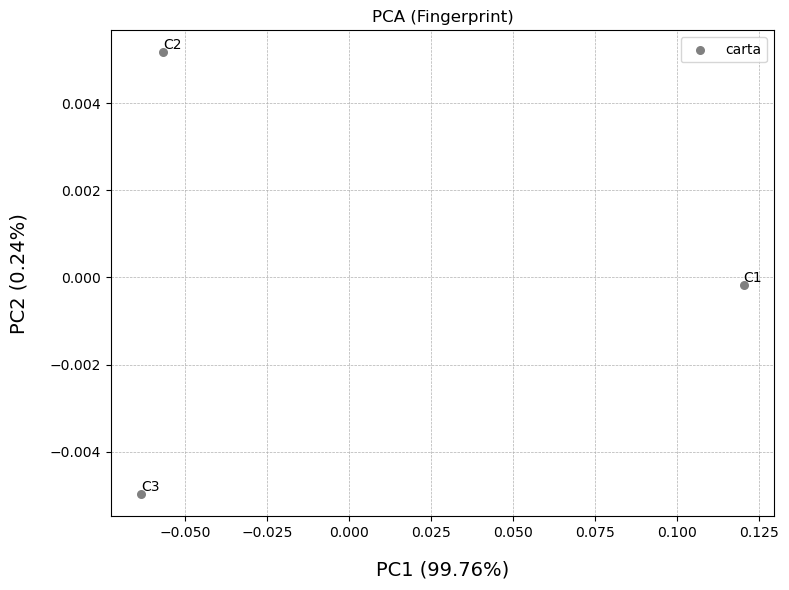

In [13]:
pca = PCA(n_components = 2)
pca.fit(data)

plt.figure(figsize = (8, 6))

colors = ["gray", "tab:blue", "darkorange"]

for i in range(len(groups)):
    df = data.loc[groups[i]]
    pca_result = pca.transform(df)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 30, color = colors[i])
    
    for j in range(len(df.index)):
        plt.text(pca_result[j, 0], pca_result[j, 1], df.index[j], horizontalalignment="left", verticalalignment="bottom")

ratio = pca.explained_variance_ratio_
        
plt.title("PCA (Fingerprint)")
plt.legend(groups)
plt.xlabel("PC1 ({:.2f}%)".format(100 * ratio[0]), fontsize = 14, labelpad = 15)
plt.ylabel("PC2 ({:.2f}%)".format(100 * ratio[1]), fontsize = 14, labelpad = 15)
plt.grid(True, "major", ls = "--", axis = "both", lw = 0.5)
plt.tight_layout()
plt.savefig("graphs/pca2d_fingerprint.png", dpi = 300)
plt.show()

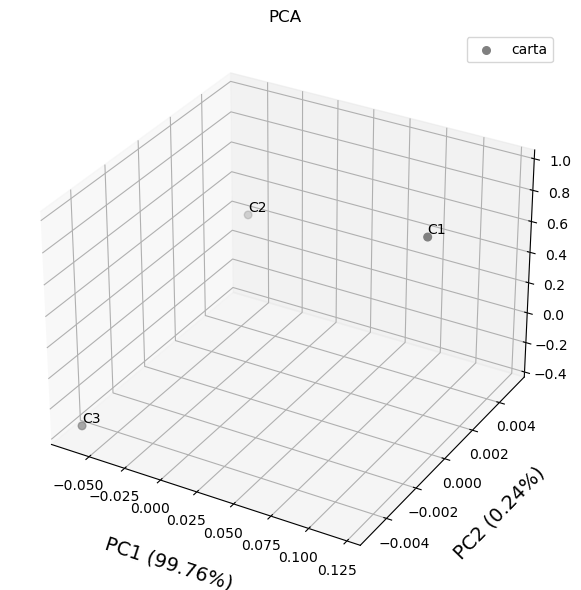

In [14]:
pca = PCA(n_components = 3)
pca.fit(data)

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(projection = "3d")

colors = ["gray", "tab:blue", "darkorange"]

for i in range(len(groups)):
    df = data.loc[groups[i]]
    pca_result = pca.transform(df)
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], s = 30, color = colors[i])
    
    for j in range(len(df.index)):
        ax.text(pca_result[j, 0], pca_result[j, 1], pca_result[j, 2], df.index[j], horizontalalignment="left", verticalalignment="bottom")

ratio = pca.explained_variance_ratio_
        
plt.title("PCA")
plt.legend(groups)
ax.set_xlabel("PC1 ({:.2f}%)".format(100 * ratio[0]), fontsize = 14, labelpad = 15)
ax.set_ylabel("PC2 ({:.2f}%)".format(100 * ratio[1]), fontsize = 14, labelpad = 15)
ax.set_zlabel("PC3 ({:.2f}%)".format(100 * ratio[2]), fontsize = 14, labelpad = 15)
plt.grid(True, "major", ls = "--", axis = "both", lw = 0.5)
plt.tight_layout()
plt.savefig("graphs/pca3d_fingerprint.png", dpi = 300)
plt.show()

## MIT License

Copyright 2023 Nicolas Lee Guidotti

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
